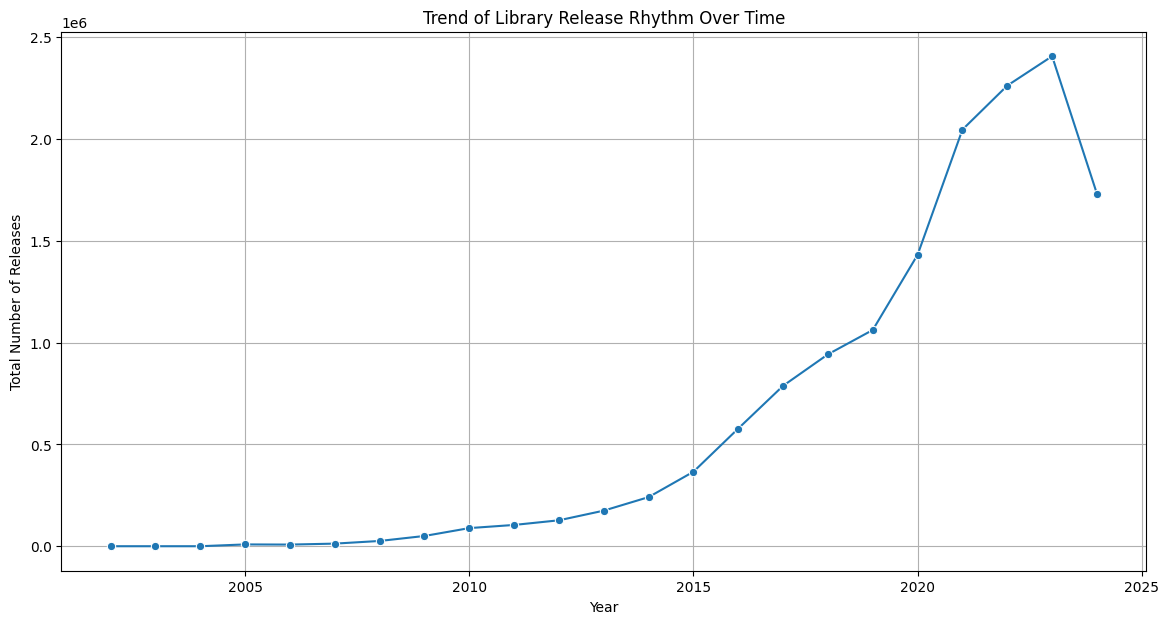

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
data = pd.read_csv("../data/dependency_data.csv")

# Convert the Release_Date column from Unix timestamp to datetime for easier time-based analysis
data['Release_Date'] = pd.to_datetime(data['Release_Date'], unit='ms')

# Extract the year from the Release_Date
data['Release_Year'] = data['Release_Date'].dt.year

# Step 1: Count releases per library by year
# We’ll group by Library and Release_Year to see the number of releases each library had per year
release_counts_per_year = data.groupby(['Library', 'Release_Year']).size().reset_index(name='Release_Count')

# Step 2: Aggregate release data by year for all libraries combined
# This gives us an overview of release frequency trends across the ecosystem
annual_release_counts = release_counts_per_year.groupby('Release_Year')['Release_Count'].sum().reset_index()

# Step 3: Plot the overall release rhythm trend over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Release_Year', y='Release_Count', data=annual_release_counts, marker='o')
plt.title("Trend of Library Release Rhythm Over Time")
plt.xlabel("Year")
plt.ylabel("Total Number of Releases")
plt.grid(True)
plt.show()


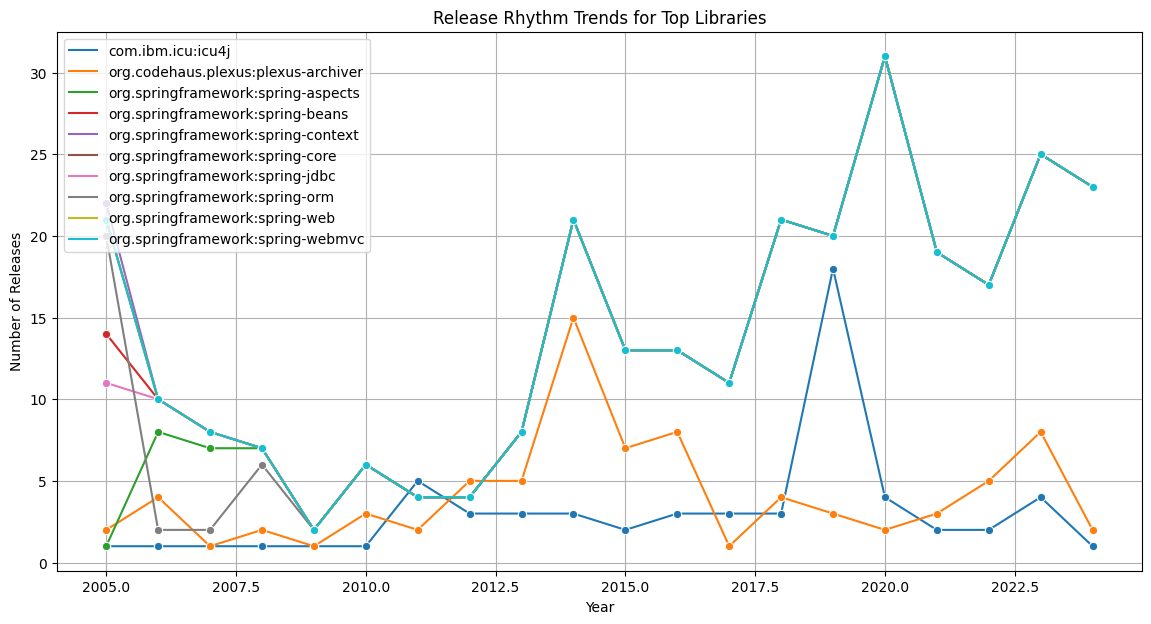

In [11]:
# Analyze release rhythm trends for specific libraries
# Example: Plot release trends for a subset of popular libraries
top_libraries = release_counts_per_year['Library'].value_counts().head(10).index
filtered_data = release_counts_per_year[release_counts_per_year['Library'].isin(top_libraries)]

plt.figure(figsize=(14, 7))
sns.lineplot(x='Release_Year', y='Release_Count', hue='Library', data=filtered_data, marker='o')
plt.title("Release Rhythm Trends for Top Libraries")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()